In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# From Hearn 1997, pg 117
def radial_stress(_r, _R1, _R2, _w, _pc, _nu):
    rs = (_nu + 3) * ( (_pc * _w**2) / 8 ) * ( _R1**2 + _R2**2 - ((_R1**2 * _R2**2)/_r**2) - _r**2)
    return rs

In [3]:
# From Hearn 1997, pg 117
def hoop_stress(_r, _R1, _R2, _w, _pc, _nu):
    hs = ((_pc * _w**2) / 8 ) * ( (_nu + 3) * ( _R1**2 + _R2**2 + ((_R1**2 * _R2**2)/_r**2)) - ((1 + 3*_nu)*_r**2))
    return hs

In [5]:
# From Table S2 Sotilli et al. 2015
R1 = 6351*1000 # m
R2 = 6371*1000 # m
pc = 2800 # kg m^-3
nu = .25

In [9]:
# Here we calculate the omega's for a standard LOD and then a standard LOD + 1 ms
T = 86400
w = (2*math.pi)/T
T1 = T + .001
w1 = (2*math.pi)/T1

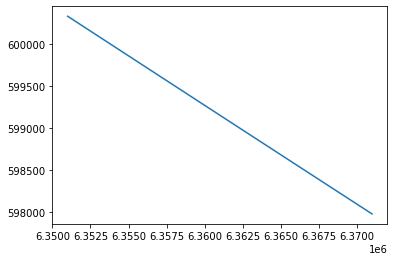

In [10]:
# It was not clear in Sotill 2015 how they generated Fig 5, it appears to be the direct output of equations 2 and 3 in the text
# from Hearn and them divide by 1000, as if the output from 2 and 3 was already in units per second ?
r = np.linspace(R1,R2,num=100)
hs = hoop_stress(r,R1,R2,w,pc,nu)
plt.plot(r,hs/1000)
plt.show()
# This plot is indentical to Fig 5 in Sotill 2015, but arrived too in a way I do not understand

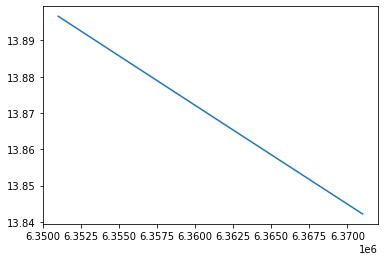

In [13]:
# Here we calculate the omega's for a standard LOD and then a standard LOD + 1 ms
# We will then calculate the hoop stress for these two days and subtract them to get the hoop stress per ms
r = np.linspace(R1,R2,num=100)
hs = hoop_stress(r,R1,R2,w,pc,nu)
hs1 = hoop_stress(r,R1,R2,w1,pc,nu)
plt.plot(r,hs-hs1)
plt.show()
# Note here that the computed value at R1 is 14 Pa

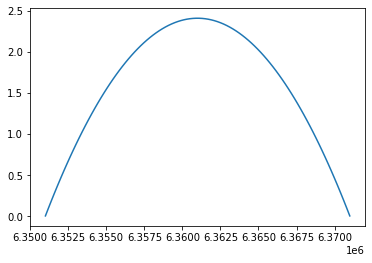

In [15]:
# It was not clear in Sotill 2015 how they generated Fig 5, it appears to be the direct output of equations 2 and 3 in the text
# from Hearn and them divide by 1000, as if the output from 2 and 3 was already in units per second ?
r = np.linspace(R1,R2,num=100)
rs = radial_stress(r,R1,R2,w,pc,nu)
plt.plot(r,rs/1000)
plt.show()
# This plot is indentical to Fig 5 in Sotill 2015, but arrived too in a way I do not understand

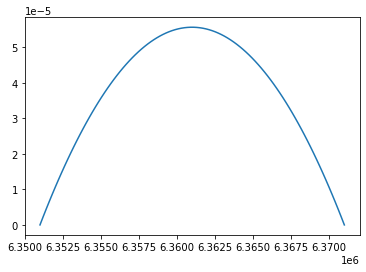

In [17]:
# Here we calculate the omega's for a standard LOD and then a standard LOD + 1 ms
# We will then calculate the hoop stress for these two days and subtract them to get the hoop stress per ms
r = np.linspace(R1,R2,num=100)
hs = radial_stress(r,R1,R2,w,pc,nu)
hs1 = radial_stress(r,R1,R2,w1,pc,nu)
plt.plot(r,hs-hs1)
plt.show()
# Note here that the computed value is again many orders of magnitude smnaller than in Sotill 2015

In [21]:
# I attempt to understand figure S11 and more importantly S12 in the supplement for Sotill 2015
# The link for the data does not yield the data set used in the paper in any easy way, the paper 
# either did not disclose which data set was redacted and how, or the data set has been moved
# from the web page. I did find a average anual rate on the referenced web page 
# https://www.iers.org/IERS/EN/Science/EarthRotation/LODsince1623.html?nn=12932
# the linked raw data on the page is a broken link
# this data is not exactly the same as that in the paper based on direct visual inspection. 
lod = np.loadtxt('Annual_LOD.csv',delimiter=',', usecols=(0, 2),skiprows=1)

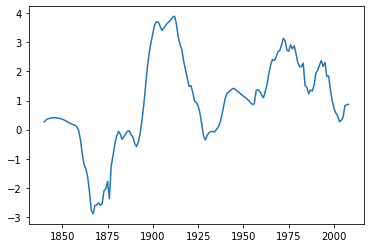

In [22]:
plt.plot(lod[:,0],lod[:,1])
# Figure S11(top) in Sotill 2015 Supplement

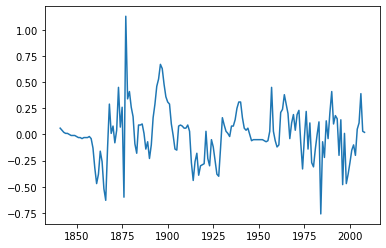

In [24]:
n = len(lod[:,0]) -1
plt.plot(lod[-n:,0],np.diff(lod[:,1]))
# figure S11 (bottom) as defined in S11 caption (roughly similar)

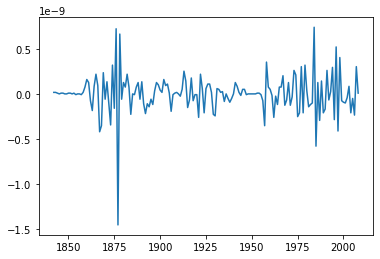

In [26]:
# Its not entirely clear what S12 (top), is. It is labeled as delta_omega(Diff) but the values are almost the 
# entire rotation rate. Perhaps it is the difference of omega based on the diffrence in time and the plot
# is not labeled correctly? The units make no sense for this. 
n = len(lod[:,0]) -2
nd = np.diff(lod[:,1])
w = (2*math.pi)/(T+nd)
plt.plot(lod[-n:,0],np.diff(w))
# this plot is orders of magnitude different base on the above assumptions

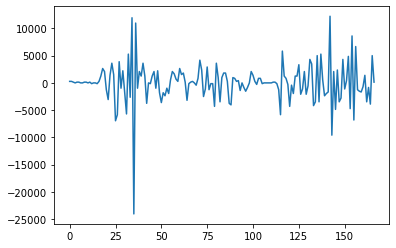

In [27]:
n = len(lod[:,0]) -2
nd = np.diff(lod[:,1])
w = (2*math.pi)/(T+nd)
plt.plot(np.diff(hoop_stress(R1,R1,R2,w,pc,nu)))


In [ ]:
# there is no obvious defintion of S12 in the text or supplement. 